In [2]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import cleaned Dataframes from Data preparation
df_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))

# Calculat the session duration in minutes, storing it in a new column `session_duration` in the DataFrame.
df_cleaned['session_duration'] = (
    pd.to_datetime(df_cleaned['disconnectTime']) - pd.to_datetime(df_cleaned['connectionTime'])
).dt.total_seconds() / 60

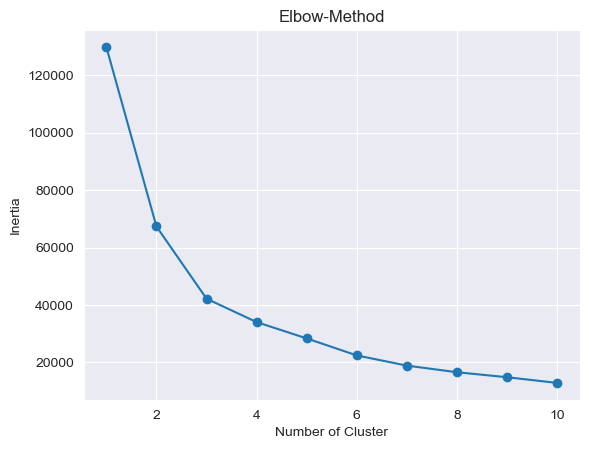

In [9]:
# Select relevant columns
features = df_cleaned[['charging_duration', 'session_duration']]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Elbow method for determining the optimum number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot of the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Method')
plt.show()

         charging_duration  connection_duration
Cluster                                        
0               192.432707           526.792517
1               119.755093           161.280480
2               480.749938           582.254045


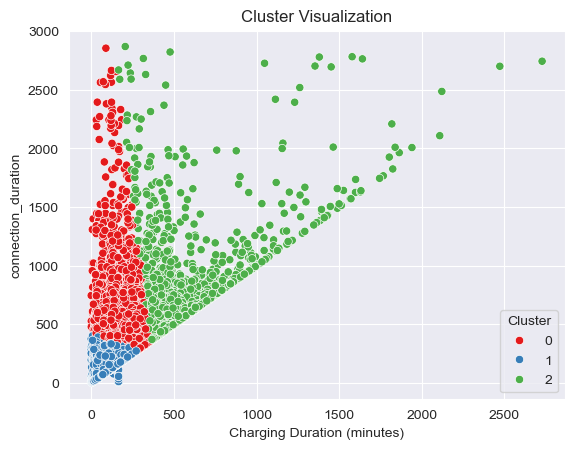

In [10]:
# K-Means clustering with the optimum number of clusters (3 or 4)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze average values per cluster and print
cluster_summary = df_cleaned.groupby('Cluster')[['charging_duration', 'connection_duration']].mean()
print(cluster_summary)

# Visualization of the clusters
sns.scatterplot(
    x='charging_duration',
    y='connection_duration',
    hue='Cluster',
    data=df_cleaned,
    palette='Set1'
)
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('connection_duration')
plt.title('Cluster Visualization')
plt.show()


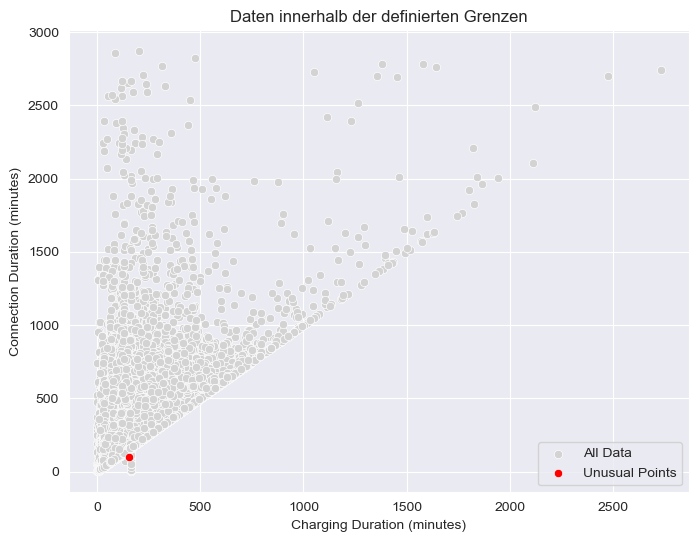

Unusual data (within the limits):
       counter                        id            connectionTime  \
50987     1868  5e7954b0f9af8b090600ec84 2020-03-07 17:19:33-08:00   

                 disconnectTime          doneChargingTime  kWhDelivered  \
50987 2020-03-07 18:56:21-08:00 2020-03-07 18:56:21-08:00         5.428   

                                    sessionID siteID spaceID    stationID  \
50987  2_39_139_28_2020-03-08 01:19:32.578632      2  CA-303  2-39-139-28   

                  timezone userID  \
50987  America/Los_Angeles    365   

                                              userInputs connection_date  \
50987  [{'WhPerMile': 333, 'kWhRequested': 9.99, 'mil...      2020-03-07   

       charging_duration  connection_duration  session_duration  Cluster  
50987         156.666667                 96.8              96.8        1  


In [11]:
# Condition for unusual data points (within the defined limits)
# To test to analyze data
unusual_data = df_cleaned[
    (df_cleaned['charging_duration'] >= 150) & (df_cleaned['charging_duration'] < 165.55) &  # Charging Duration in
    (df_cleaned['connection_duration'] >= 0) & (df_cleaned['connection_duration'] <= 145)  # Connection Duration in
]

# The line created by our rounding
# unusual_data = df_cleaned[
#     (df_cleaned['charging_duration'] == 165.55)
# ]

# Visualization of the unusual data points in the context of the entire data set
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='charging_duration',
    y='connection_duration',
    data=df_cleaned,
    color='lightgrey',
    label='All Data'
)
sns.scatterplot(
    x='charging_duration',
    y='connection_duration',
    data=unusual_data,
    color='red',
    label='Unusual Points'
)
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Connection Duration (minutes)')
plt.title('Daten innerhalb der definierten Grenzen')
plt.legend()
plt.show()

# Output of the unusual data
print("Unusual data (within the limits):")
print(unusual_data)

It also shows that there is data with errors. Anything below the line is not possible. This is either due to a missing disconection time that we added manually or to errors in the data as in the line with the ID 5e7954b0f9af8b090600ec84

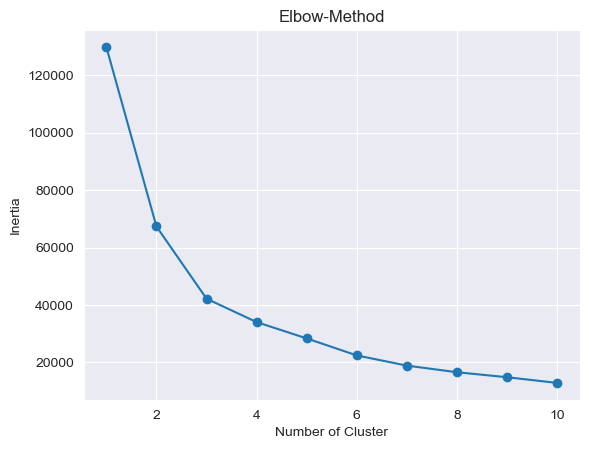

In [12]:
# Select relevant columns
features = df_cleaned[['charging_duration', 'connection_duration']]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Elbow method for determining the optimum number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot of the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Method')
plt.show()

         charging_duration  connection_duration
Cluster                                        
0               300.941980           435.336214
1               110.947354           153.802175
2               529.642340           619.729940
3               147.008080           568.623257


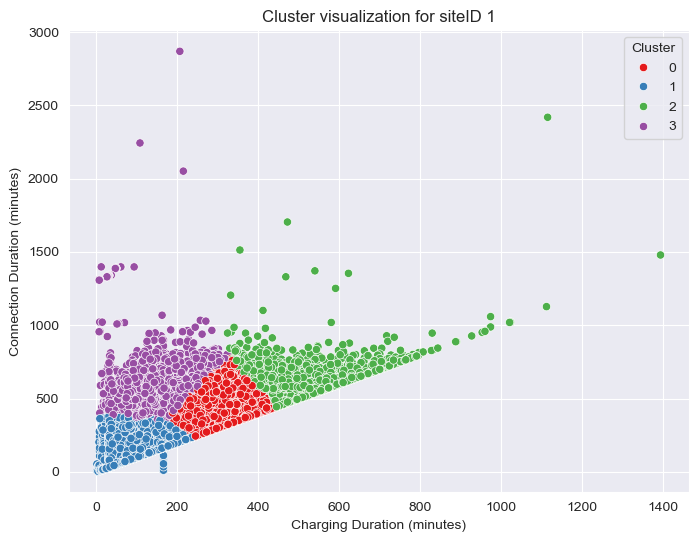

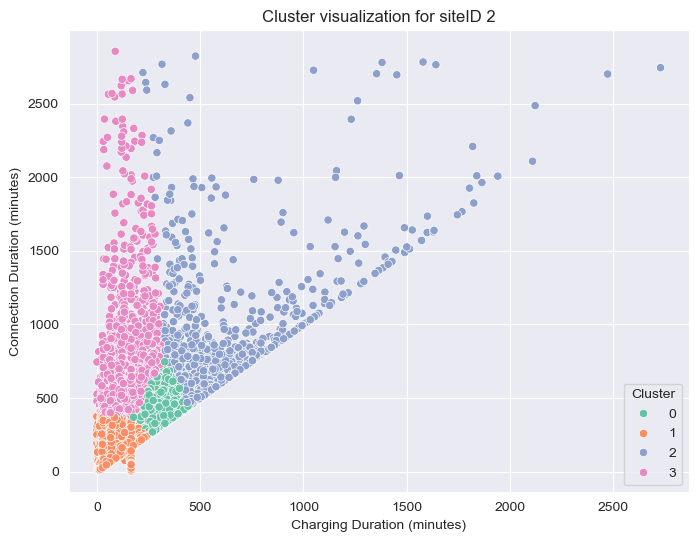

In [14]:
# K-Means clustering with the optimum number of clusters (e.g. 3)
optimal_k = 4 #I think maybe even 4 make sense here, but the Elbow method says otherwise :sadface

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze average values per cluster
cluster_summary = df_cleaned.groupby('Cluster')[['charging_duration', 'connection_duration']].mean()
print(cluster_summary)

# Filter for siteID 1 and 2 and ensure that the cluster column is still present
df_site1 = df_cleaned[df_cleaned['siteID'] == '1']
df_site2 = df_cleaned[df_cleaned['siteID'] == '2']

# Visualization for siteID 1
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='charging_duration',
    y='connection_duration',
    hue='Cluster',
    data=df_site1,
    palette='Set1'
)
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Connection Duration (minutes)')
plt.title('Cluster visualization for siteID 1')
plt.legend(title='Cluster', loc='best')
plt.show()

# Visualization for siteID 2
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='charging_duration',
    y='connection_duration',
    hue='Cluster',
    data=df_site2,
    palette='Set2'
)
plt.xlabel('Charging Duration (minutes)')
plt.ylabel('Connection Duration (minutes)')
plt.title('Cluster visualization for siteID 2')
plt.legend(title='Cluster', loc='best')
plt.show()

With the line upwards, we do not have an idle time but a connction time of the same length as the charging duration

You can see that site 2 has very high idle times and site 1 has rather low idle times and the cars leave the site again after loading is complete
This underlines the observations in other analysis that site2 is a office and site 1 is public

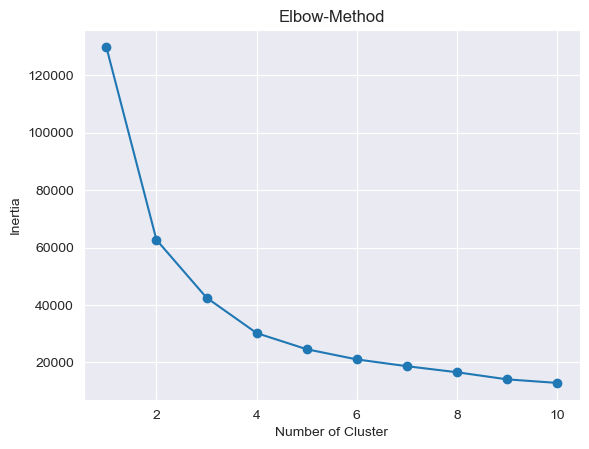

In [15]:
# Select relevant columns
features = df_cleaned[['kWhDelivered', 'charging_duration']]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Elbow method for determining the optimum number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot of the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Method')
plt.show()

         kWhDelivered  charging_duration
Cluster                                 
0           14.550381         316.319878
1            6.455230         114.565503
2           36.815870         447.531882


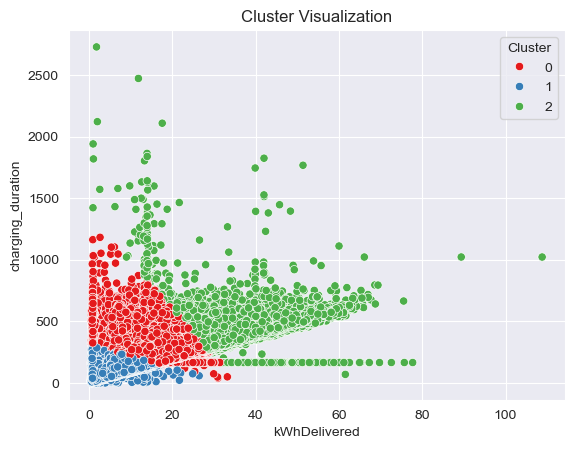

In [16]:
# K-Means clustering with the optimum number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze average values per cluster
cluster_summary = df_cleaned.groupby('Cluster')[['kWhDelivered', 'charging_duration']].mean()
print(cluster_summary)

# Visualization of the clusters
sns.scatterplot(
    x='kWhDelivered',
    y='charging_duration',
    hue='Cluster',
    data=df_cleaned,
    palette='Set1'
)
plt.xlabel('kWhDelivered')
plt.ylabel('charging_duration')
plt.title('Cluster Visualization')
plt.show()


The line below is the data that has no charging duration and we have taken this with the average => This leads to a few error (not possible) data
The other not possible Datapoints are Errors in the data set as explained above

In [17]:
# Check how many datapoints are out of normal because of missing Done Charging time
filtered_data = df_cleaned[
    (df_cleaned['charging_duration'] == 165.55) &
    (df_cleaned['kWhDelivered'] > 20)
]
# Number of results
count = filtered_data.shape[0]
print(f"Anzahl der Ergebnisse: {count}")

# Output data
print(filtered_data)


Anzahl der Ergebnisse: 909
       counter                        id            connectionTime  \
3756      3756  5ea3848df9af8b428bf97225 2020-04-08 09:36:53-07:00   
3768      3768  5ea7790bf9af8b4e1ade47c3 2020-04-11 13:00:31-07:00   
3770      3770  5eaa1c0df9af8b55cb21b43d 2020-04-13 06:24:18-07:00   
3773      3773  5eaa1c0df9af8b55cb21b440 2020-04-13 07:59:44-07:00   
3775      3775  5eaa1c0df9af8b55cb21b442 2020-04-13 09:20:33-07:00   
...        ...                       ...                       ...   
52836     1249  5c36631ef9af8b4639a8e599 2018-10-08 07:09:38-07:00   
52841     1254  5c36631ef9af8b4639a8e59e 2018-10-08 07:22:15-07:00   
52843     1256  5c36631ef9af8b4639a8e5a0 2018-10-08 07:27:15-07:00   
52855     1268  5c36631ef9af8b4639a8e5ac 2018-10-08 07:48:43-07:00   
56225     4638  5c367179f9af8b4639a8f2d6 2018-12-21 05:29:37-08:00   

                 disconnectTime          doneChargingTime  kWhDelivered  \
3756  2020-04-08 20:43:29-07:00 2020-04-08 12:22:26-07:00

In [36]:
# Check Outliners and if they are true
filtered_data = df_cleaned[
    (df_cleaned['charging_duration'] < 164.55) &
    (df_cleaned['kWhDelivered'] > 60)
]
# Number of results
count = filtered_data.shape[0]
print(f"Anzahl der Ergebnisse: {count}")

# Output data
print(filtered_data)

Anzahl der Ergebnisse: 1
       counter                        id            connectionTime  \
18648     4345  610c829df9af8b0580e98737 2021-07-20 15:20:06-07:00   

                 disconnectTime          doneChargingTime  kWhDelivered  \
18648 2021-07-21 08:18:06-07:00 2021-07-20 16:29:23-07:00     61.530327   

                                    sessionID siteID  spaceID    stationID  \
18648  1_1_179_791_2021-07-20 22:20:05.654930      1  AG-3F26  1-1-179-791   

                  timezone userID  \
18648  America/Los_Angeles    394   

                                              userInputs connection_date  \
18648  [{'WhPerMile': 283, 'kWhRequested': 28.3, 'mil...      2021-07-20   

       charging_duration  connection_duration  session_duration  Cluster  
18648          69.283333               1018.0            1018.0        2  


I think that the data point is very strange, but it is also in Excel. Outlier or what is that?
User 394 has a total of 23 charging sessions, but none of them have even come close to the same performance. Not even at the same SpaceID and StationID => Error in the data set
Field number 18650


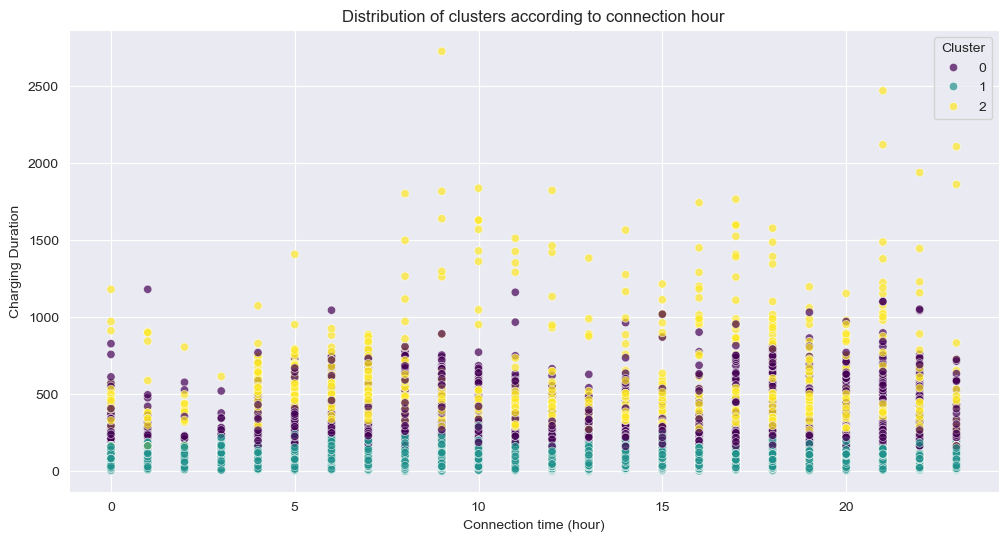

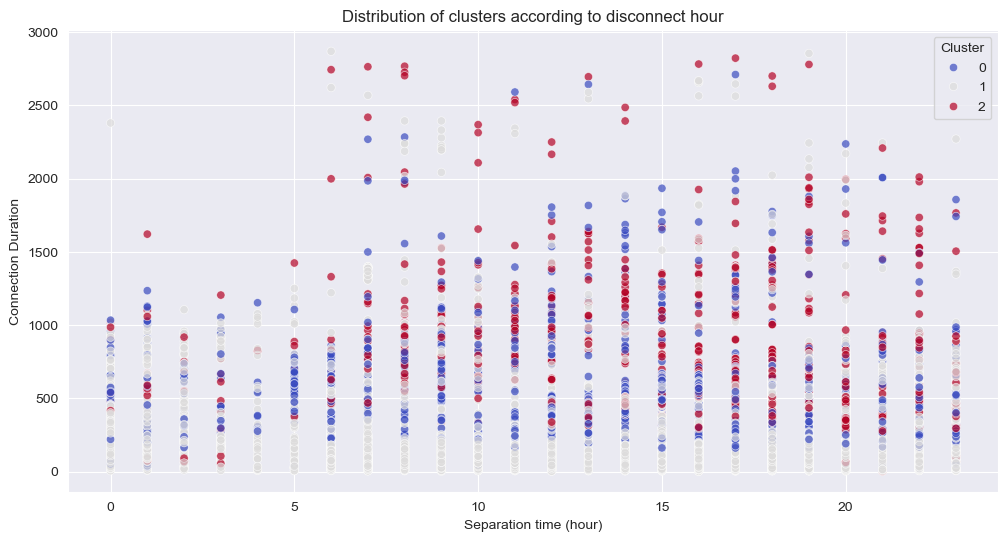

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract date time in hours
df_cleaned['connection_hour'] = pd.to_datetime(df_cleaned['connectionTime']).dt.hour
df_cleaned['disconnect_hour'] = pd.to_datetime(df_cleaned['disconnectTime']).dt.hour

# Scatterplot for the distribution of clusters by connection time
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_cleaned,
    x='connection_hour',
    y='charging_duration',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Distribution of clusters according to connection hour')
plt.xlabel('Connection time (hour)')
plt.ylabel('Charging Duration')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Scatterplot for the distribution of clusters by separation time
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_cleaned,
    x='disconnect_hour',
    y='connection_duration',
    hue='Cluster',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Distribution of clusters according to disconnect hour')
plt.xlabel('Separation time (hour)')
plt.ylabel('Connection Duration')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


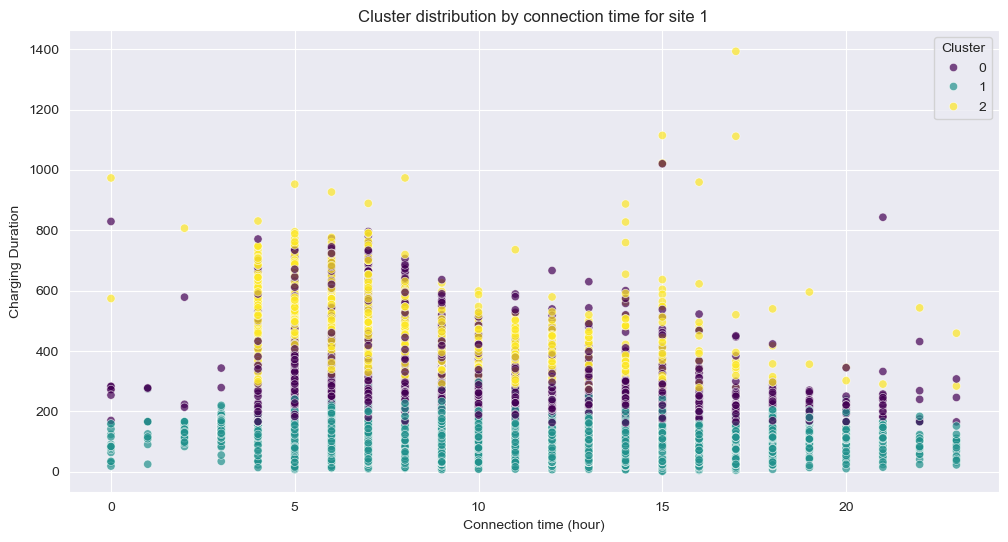

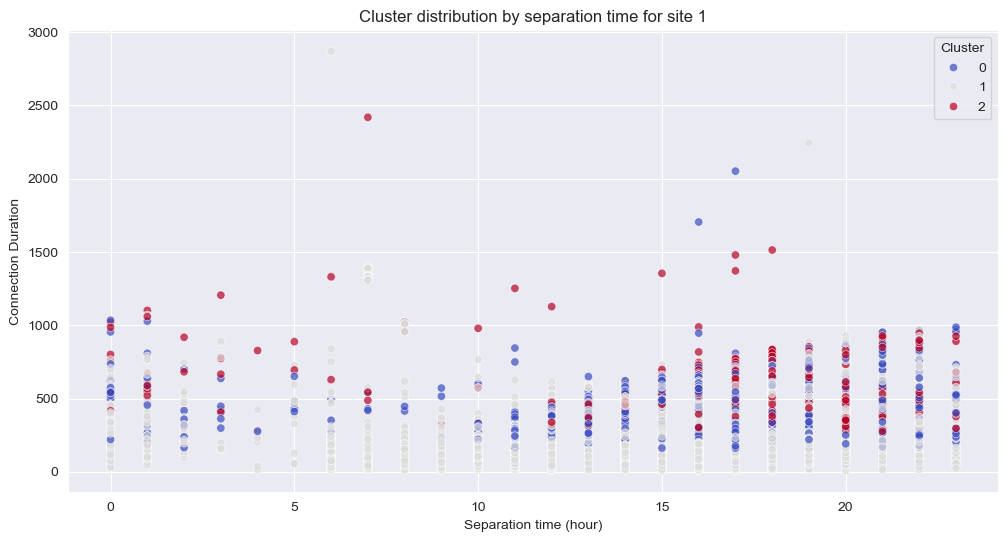

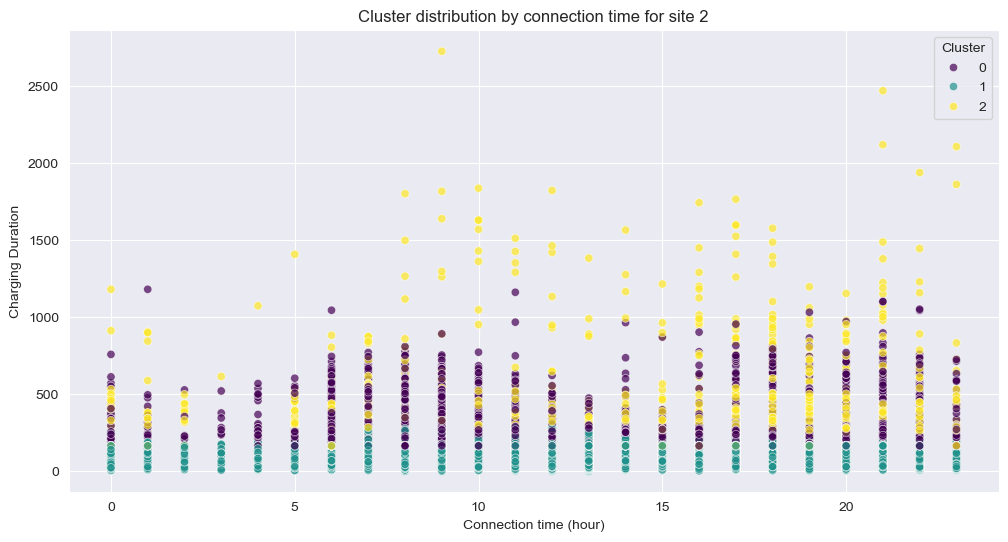

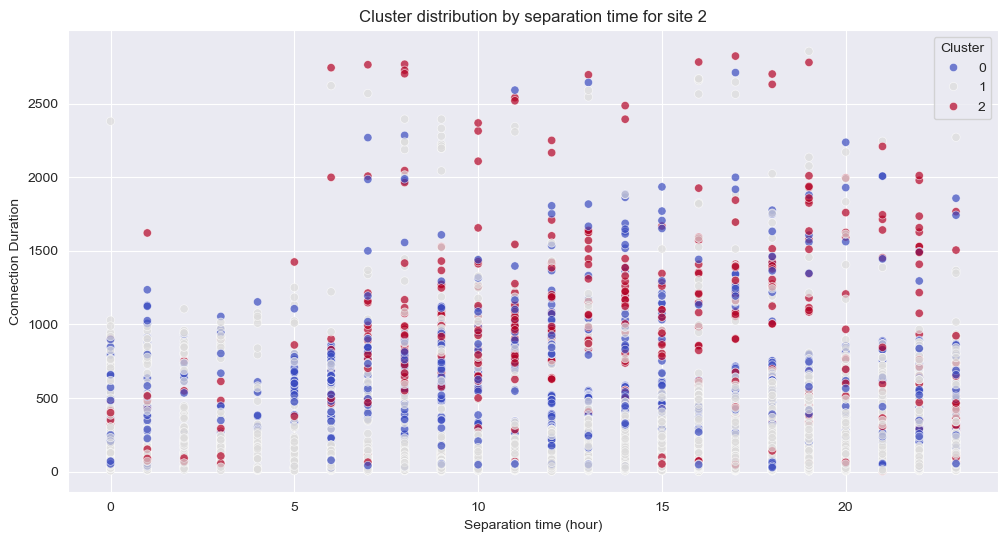

In [19]:
# Scatterplot for the distribution of clusters by connection time, separated by SiteID
site_ids = df_cleaned['siteID'].unique()

for site in site_ids:
    site_data = df_cleaned[df_cleaned['siteID'] == site]

    # Scatterplot: Connection time vs. charging time
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=site_data,
        x='connection_hour',
        y='charging_duration',
        hue='Cluster',
        palette='viridis',
        alpha=0.7
    )
    plt.title(f'Cluster distribution by connection time for site {site}')
    plt.xlabel('Connection time (hour)')
    plt.ylabel('Charging Duration')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    # Scatterplot: Disconnection time vs. connection duration
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=site_data,
        x='disconnect_hour',
        y='connection_duration',
        hue='Cluster',
        palette='coolwarm',
        alpha=0.7
    )
    plt.title(f'Cluster distribution by separation time for site {site}')
    plt.xlabel('Separation time (hour)')
    plt.ylabel('Connection Duration')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


Just an idea, but it doesn't really help that much at first, does it?
I think the plot from Paul does make more sense without clustering. It really just does not make sense to me to cluster these